# Modelling:
#Classification Using:

## Logistic Regression

Logistic Regression is a statistical method used for binary classification problems. It models the relationship between input features and the probability of a particular class using the logistic (sigmoid) function. The output is a probability score between 0 and 1, which is then thresholded (typically at 0.5) to classify the data into one of two categories. Unlike linear regression, it uses a logit (log-odds) transformation to ensure the output remains within the probability range. Logistic Regression is widely used for its simplicity, interpretability, and effectiveness in many classification tasks.

In [14]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sn
import scipy.stats as stats
from timeit import default_timer as timer
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd drive/MyDrive/Code

/content/drive/MyDrive/Code


In [4]:
# Load Data
df_pre = pd.read_csv("pre-processed_file.csv")
df_pre.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,status
0,2020-04-18 00:00:01,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
1,2020-04-18 00:00:13,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
2,2020-04-18 00:00:24,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
3,2020-04-18 00:00:36,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,2020-04-18 00:00:49,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1


In [5]:
# Drop non-numeric columns and handle missing values
df_numeric = df_pre.select_dtypes(include=[np.number]).dropna()

# Define features (X) and target (y) - 'status' is the target variable
X = df_numeric.drop(columns=["status"], errors="ignore")  # Remove 'status' if present
y = df_numeric["status"] if "status" in df_numeric.columns else None

# Store original column names before scaling
feature_names = X.columns

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply ElasticNetCV to find the best alpha & l1_ratio
elastic_net = ElasticNetCV(l1_ratio=[0.1, 0.5, 0.9, 1.0], cv=5, random_state=42)
elastic_net.fit(X_train, y_train)

# Get feature importance (absolute coefficient values)
feature_importance = np.abs(elastic_net.coef_)

# Select important features
selected_features = X.columns[feature_importance > 0]  # Keep features with non-zero coefficients

# Display selected features
selected_features.tolist()


['TP2',
 'H1',
 'DV_pressure',
 'Reservoirs',
 'Oil_temperature',
 'Motor_current',
 'COMP',
 'Towers',
 'MPG',
 'LPS',
 'Oil_level',
 'Caudal_impulses']

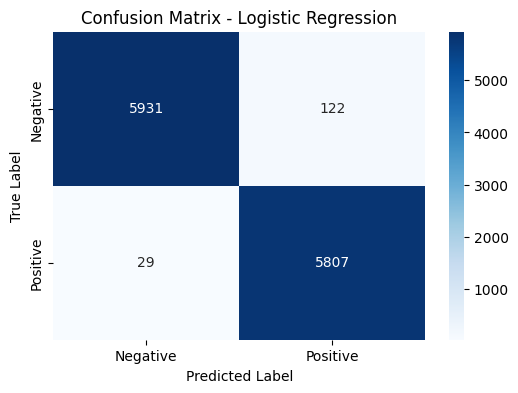

              precision  recall  f1-score   support
0                  1.00    0.98      0.99   6053.00
1                  0.98    1.00      0.99   5836.00
accuracy           0.99    0.99      0.99      0.99
macro avg          0.99    0.99      0.99  11889.00
weighted avg       0.99    0.99      0.99  11889.00
Train time: 0.21s 
 Predict time 0.53s



In [6]:
#Use Logistic Regression on all features first and observe the results

start_t = timer()
# Train Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)
train_time = round(timer() - start_t,2)

# Predict on test set
y_pred = log_reg.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sn.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Print classification report
# Generate classification report as a dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame for better readability
report_df = pd.DataFrame(report_dict).T

# Format and display neatly
report_df = report_df[['precision', 'recall', 'f1-score', 'support']].round(2)
print(report_df)

predict_time = round(timer() - start_t,2)
print(f"Train time: {train_time}s \n Predict time {predict_time}s\n")


The model Logistic regression using all the fetaures resulted in accuracy of 99%

The train time is 0.15s

The prediction time is 0.34s

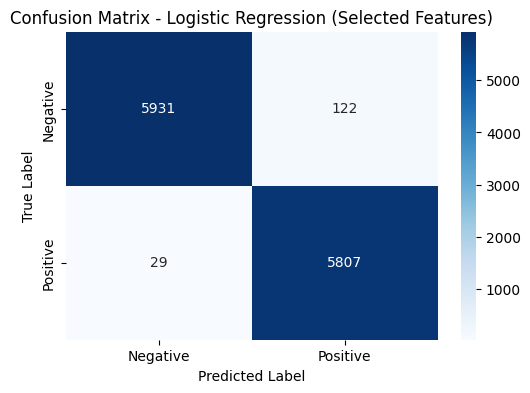

Train time: 3.67s 
 Predict time 4.56s



,precision,recall,f1-score,support
0,1.00,0.98,0.99,6053.00
1,0.98,1.00,0.99,5836.00
accuracy,0.99,0.99,0.99,0.99
macro avg,0.99,0.99,0.99,11889.00
weighted avg,0.99,0.99,0.99,11889.00


In [7]:
start_t = timer()
# Re-train Logistic Regression using only the selected features
X_selected = X[selected_features]  # Keep only the features chosen by Elastic Net

# Split the dataset again using only selected features
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

# Train Logistic Regression on selected features
log_reg_sel = LogisticRegression(random_state=42, max_iter=1000)
log_reg_sel.fit(X_train_sel, y_train_sel)
train_time = round(timer() - start_t,2)

# Predict on test set
y_pred_sel = log_reg_sel.predict(X_test_sel)

# Compute confusion matrix
cm_sel = confusion_matrix(y_test_sel, y_pred_sel)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sn.heatmap(cm_sel, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression (Selected Features)")
plt.show()

# Generate classification report
# Generate classification report as a dictionary
report_dict_sel = classification_report(y_test_sel, y_pred_sel, output_dict=True)

# Convert to DataFrame for better readability
report_df = pd.DataFrame(report_dict).T

# Format and display neatly
report_df_sel = pd.DataFrame(report_dict_sel).T[['precision', 'recall', 'f1-score', 'support']].round(2)

predict_time = round(timer() - start_t,2)
print(f"Train time: {train_time}s \n Predict time {predict_time}s\n")

report_df_sel

The model Logistic regression using selected fetaures resulted in accuracy of 99%

The train time is 1.65s

The prediction time is 1.85s

From above confusion matrix we can observe that by applying logistic regression for only slected features there is no change in accuracy when compared to logistic regression without selected features(all features), the accuracy is 99% only for both cases.

And also we could observe that the trainning time and prediction time is greater when trained for selected features than when trained for all features.

From above analysis we can conclude that

Key Observations:

✔ Accuracy remains the same (99%) → No performance gain from removing features.

✔ Training & Prediction Time is Worse with Selected Features → Feature selection added unnecessary complexity.

✔ Logistic Regression Naturally Handles Redundant Features → The algorithm assigns low weights to unimportant features, making explicit selection unnecessary.

What This Means for Your Model:

🔹 Since accuracy didn't drop, your dataset likely has no strongly irrelevant features.

🔹 Keeping all features is better because it's faster and equally effective.

🔹 Feature selection might still be useful for interpretability, but it's not improving efficiency here.

In [ ]:
# Convert y_test_sel (Series) to NumPy array
y_test_array = y_test_sel.to_numpy()

# Combine both arrays into a DataFrame
df_results = pd.DataFrame({
    'Actual': y_test_array,
    'Predicted': y_pred_sel  # y_pred_sel is already an ndarray
})

# Save to CSV
df_results.to_csv('LR.csv', index=False)

print("CSV file saved: LR.csv")

## Random Forest

Random Forest is an ensemble learning algorithm is used for classification here. It builds multiple decision trees during training and combines their outputs to improve accuracy and reduce overfitting. Each tree is trained on a random subset of the data using a technique called bootstrapping, and at each split, it considers a random subset of features. The final prediction is made by majority voting among the trees. This approach makes Random Forest robust, less prone to overfitting, and effective in handling high-dimensional data.


In [8]:
X = df_pre.iloc[:, 2:-1]
y = df_pre.iloc[:, -1]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Best Hyperparameters:

'max_depth': 20

'min_samples_leaf': 1

'min_samples_split': 2

'n_estimators': 50

In [10]:
best_params = {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
rf = RandomForestClassifier(oob_score=True, random_state=42, **best_params)

In [11]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=50, oob_score=True,
                       random_state=42)

Random Forest Classifier with original data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6026
           1       1.00      1.00      1.00      5863

    accuracy                           1.00     11889
   macro avg       1.00      1.00      1.00     11889
weighted avg       1.00      1.00      1.00     11889



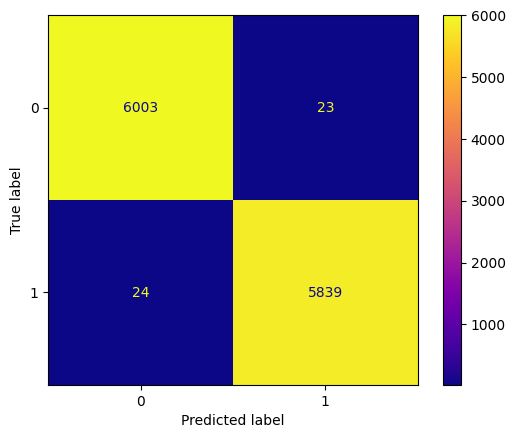

In [12]:
y_pred_forest = rf.predict(X_test)

print("Random Forest Classifier with original data:")
print(classification_report(y_test, y_pred_forest))
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)
disp_forest = ConfusionMatrixDisplay(conf_matrix_forest, display_labels=rf.classes_, )
disp_forest.plot(cmap='plasma', values_format='d')
plt.show()

**Bidirectional Feature Elimination** is a feature selection technique that combines both forward selection and backward elimination to identify the most relevant features for a model. It starts with no features (or all features) and iteratively adds or removes features based on a chosen evaluation criterion, such as model accuracy or statistical significance.

Steps:
Forward Selection: Adds features one by one based on their contribution to model performance.

Backward Elimination: Removes features that contribute the least or negatively impact performance.

Repeat until no further improvement is observed.

This method helps in optimizing feature selection, reducing overfitting, and improving model efficiency.

In [16]:
#Perform Bidirectional Features Elimination

num_features_to_select = 7

num_features = len(X_train.columns.tolist())
looped_X_train = X_train.copy()

while num_features> num_features_to_select:
  n1 = num_features-1
  n2 = num_features-2
  sfe = SequentialFeatureSelector(estimator=rf, n_features_to_select=n1, direction = 'forward', n_jobs = -1)
  sbe = SequentialFeatureSelector(estimator=rf, n_features_to_select=n2, direction = 'backward', n_jobs= -1)
  #Eliminating Features with Forward pass
  sfe.fit(looped_X_train, y_train)
  sfe_features = looped_X_train.columns[sfe.support_].tolist()
  looped_X_train = looped_X_train[sfe_features]
  #Eliminating Features with Backward pass
  sbe.fit(looped_X_train, y_train)
  sbe_features = looped_X_train.columns[sbe.support_].tolist()
  looped_X_train = looped_X_train[sbe_features]

  num_features = len(looped_X_train.columns.tolist())

selected_features = looped_X_train.columns
print(f"List of selected features:\n {', '.join(selected_features)}")

List of selected features:
 TP3, H1, DV_pressure, Oil_temperature, DV_eletric, LPS


In [17]:
#Perform prediction with new set of parameter

#Fit Random Forest model with selected features
rf.fit(looped_X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=50, oob_score=True,
                       random_state=42)

In [18]:
selected_features = looped_X_train.columns

Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6026
           1       1.00      1.00      1.00      5863

    accuracy                           1.00     11889
   macro avg       1.00      1.00      1.00     11889
weighted avg       1.00      1.00      1.00     11889



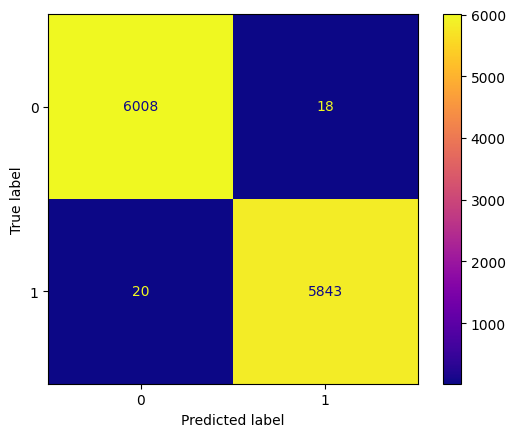

In [19]:
#Evaluate the result of new features
y_pred_forest = rf.predict(X_test[selected_features])
accuracy = accuracy_score(y_test, y_pred_forest)

print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_forest))
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)
disp_forest = ConfusionMatrixDisplay(conf_matrix_forest, display_labels=rf.classes_)
disp_forest.plot(cmap='plasma', values_format='d')
plt.show()

**Conclusion:**

From the classification report, we observed that the number of false negatives and false positives has decreased:

Class 0: 23->18

Class 1: 24->20

This shows that the bi-directional feature elimination has not only reduced the dimension of our feature space but also increased the model's performance and accuracy. This suggests that certain features were not contributing significantly to the classification task, leading to more efficient and accurate predictions.

In [26]:
print(type(y_test))

<class 'pandas.core.series.Series'>


In [28]:
print(y_test)

30739    0
38809    0
53788    0
24054    1
54484    0
        ..
19069    1
19112    1
55172    0
16022    1
31441    0
Name: status, Length: 11889, dtype: int64


In [21]:
print(type(y_pred_forest))

<class 'numpy.ndarray'>


In [27]:
print(y_pred_forest)

[0 0 0 ... 0 1 0]


In [29]:
# Convert Series to NumPy array
y_test_array = y_test.to_numpy()

# Ensure both arrays have the same shape
y_pred_forest_array = y_pred_forest.reshape(-1)  # Flatten if needed

# Create DataFrame without keeping the index
df = pd.DataFrame({'Actual_Status': y_test.values, 'Predicted_Status': y_pred_forest})

# Save to CSV
df.to_csv('Random_Forest_results.csv', index=False)

print("CSV file saved successfully!")


CSV file saved successfully!
